### Compare samples to profile readings

I took water samples at 7 depths, using the x marks downstream of the downstream canyon plus a sample at the surface.

Probe P21

In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
from scipy.interpolate import interp1d
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
sns.set_style('white')
sns.set_context('paper')

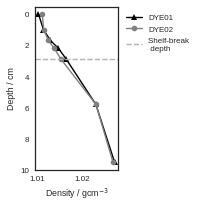

In [12]:
# Samples taken on August 23 before DYE01 and DYE02
density1 = np.array([1.01023,1.01133,1.01291,1.0147,1.01646,1.023107,1.0273])
density2 = np.array([1.01108,1.01139,1.01245,1.01376,1.01528,1.02312,1.02695])
depths = np.array([0,1.0,1.7,2.2,2.9,5.8,9.5])

fig, ax = plt.subplots(1,1,figsize=(1.5,3))
ax.plot(density1, depths, '^-',color='k',label='DYE01')
ax.plot(density2, depths, 'o-',color='0.5', label='DYE02')
ax.axhline(2.9, color='0.7', linestyle='--', label='Shelf-break \n depth')
ax.invert_yaxis()
ax.set_xlabel(r'Density / gcm$^{-3}$')
ax.set_ylabel('Depth / cm')
ax.legend(bbox_to_anchor=(1,1))
plt.savefig('figures/density_profile.pdf', format='pdf', bbox_inches='tight')

### Profiler

-0.014155712109717401 7.773152126171194


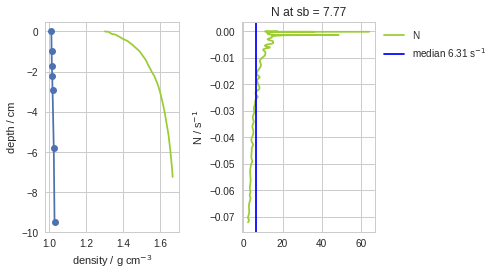

In [7]:
fig, (ax, ax1) = plt.subplots(1,2,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_23aug19/03_profile1.mat'   

ini = 1190
end = 1450
rho_0 = 998.5
g = 9.81

mat = sio.loadmat(filepath, squeeze_me=True)
P3_unfilt = mat['ch3'] #dens_C(mat['ch2'])
P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
time_cond = mat['time']
   
time_int = time_cond[ini:end]-time_cond[ini]
dist_int = ptools.profiler_08aug(time_int)
density = 1000*((ctools.densP_17Aug19(P3[ini:end])))
distance = 0.01*(dist_int[:])

ax.plot(density/1000,dist_int, label='profiler', color='yellowgreen')

No = ((g/rho_0)*(-(density[2:]-density[:-2])/(distance[2:]-distance[:-2])))**0.5
ax1.plot(No,
         distance[1:-1], 
         label='N', color='yellowgreen')
ax1.axvline(np.nanmedian(No), color='b', label='median %1.2f s$^{-1}$'%np.nanmedian(No))
ax1.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('depth / cm')
ax1.set_ylabel('depth / m')
ax.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('N / s$^{-1}$')
ax.plot(density1, -1*depths, 'o-',label='run01')
print(distance[100],No[100])
ax1.set_title('N at sb = %1.2f' %No[100] )
plt.tight_layout()

Text(0,0.5,'reading')

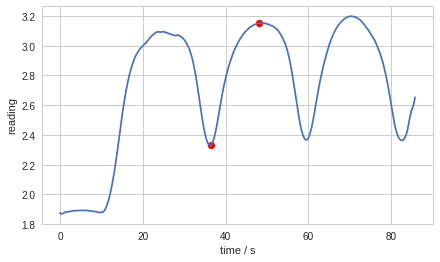

In [8]:
fig, (ax) = plt.subplots(1,1,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_23aug19/05_profile2.mat'   
ini = 850
end = 1120

mat = sio.loadmat(filepath, squeeze_me=True)
P3_unfilt = mat['ch3'] #dens_C(mat['ch2'])
P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
time_cond = mat['time']
ax.scatter(time_cond[ini],P3[ini],color='red')
ax.scatter(time_cond[end],P3[end],color='red')
ax.plot(time_cond,P3)
ax.set_xlabel('time / s')
ax.set_ylabel('reading')

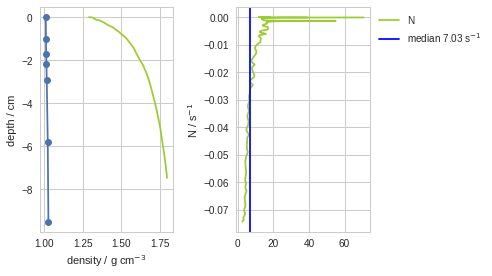

In [9]:
fig, (ax, ax1) = plt.subplots(1,2,figsize=(7,4))

filepath = '../../Conduino/experiments/exp_23aug19/05_profile2.mat'   
ini = 850
end = 1120

rho_0 = 998.5
g = 9.81

mat = sio.loadmat(filepath, squeeze_me=True)
P3_unfilt = mat['ch3'] #dens_C(mat['ch2'])
P3 = ctools.filter_timeseries(P3_unfilt,winlen=100)
time_cond = mat['time']
   
time_int = time_cond[ini:end]-time_cond[ini]
dist_int = ptools.profiler_08aug(time_int)
density = 1000*((ctools.densP_17Aug19(P3[ini:end])))
distance = 0.01*(dist_int[:])

ax.plot(density/1000,dist_int, label='profiler', color='yellowgreen')

No = ((g/rho_0)*(-(density[2:]-density[:-2])/(distance[2:]-distance[:-2])))**0.5
ax1.plot(No,
         distance[1:-1], 
         label='N', color='yellowgreen')
ax1.axvline(np.nanmedian(No), color='b', label='median %1.2f s$^{-1}$'%np.nanmedian(No))
ax1.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('depth / cm')
ax1.set_ylabel('depth / m')
ax.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('N / s$^{-1}$')
ax.plot(density1, -1*depths, 'o-',label='run01')
plt.tight_layout()

In [18]:
0.10/(1.08E-4*8.3E3)

0.11155734047300313

In [15]:
(4.5E-3*200)/1.08E-4

8333.333333333332